## Observations and Insights 

In [6]:
# Dependencies and Setup
#%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata
study_results
# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Checking the number of mice.


In [2]:

# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = merged_data[merged_data.duplicated(keep = False)]
duplicate_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data = merged_data.drop_duplicates(['Mouse ID', 'Timepoint'])
merged_data = merged_data.rename(columns = {"Tumor Volume (mm3)" : "Tumor_volume"})
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice in the clean DataFrame.
mouse_count = merged_data['Mouse ID'].count()
mouse_count

1888

## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

In [6]:
regimen = merged_data[['Drug Regimen', 'Tumor_volume']]

In [7]:
tumor_vol_stats = regimen.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])

In [8]:
tumor_vol_stats

Tumor_volume                                          
                     mean     median        var       std       sem
Drug Regimen                                                       
Capomulin       40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin        52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol       52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril        55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol        54.331565  52.509285  66.173479  8.134708  0.596466
Placebo         54.033581  52.288934  61.168083  7.821003  0.581331
Propriva        52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane        40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn        54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol       53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count = merged_data.groupby(['Drug Regimen'])
regimen.groupby('Drug Regimen')

In [10]:
drug_count=drug_count['Mouse ID'].count()

In [11]:
drug_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<AxesSubplot:title={'center':'Total measurements taken on each drug regimen'}, ylabel='Drug Regimen'>

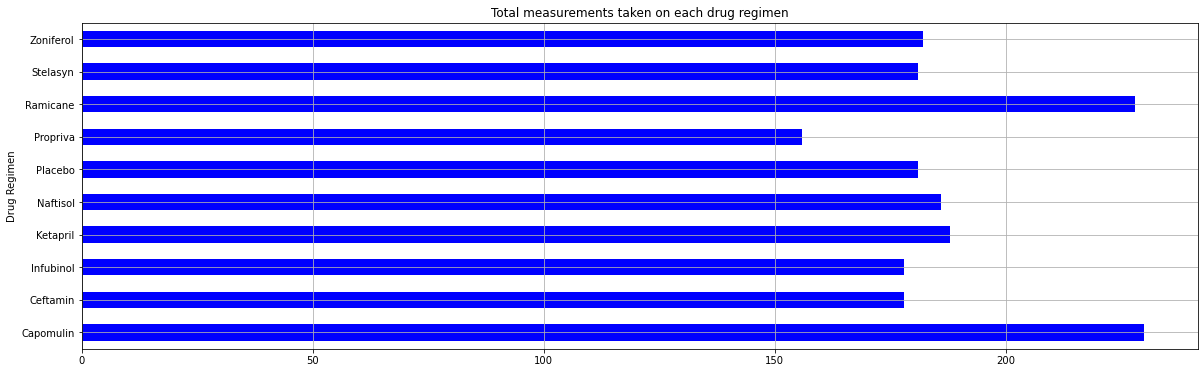

In [12]:
drug_count.plot(x="Number of Measurements" , y="Drug Regimen", kind="barh", title = "Total measurements taken on each drug regimen", figsize=(20,6), grid = True, color='b')


In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs= merged_data['Drug Regimen'].value_counts()

In [14]:
x_axis = np.arange(len(drugs))

In [15]:
tick_locations = [value for value in x_axis]

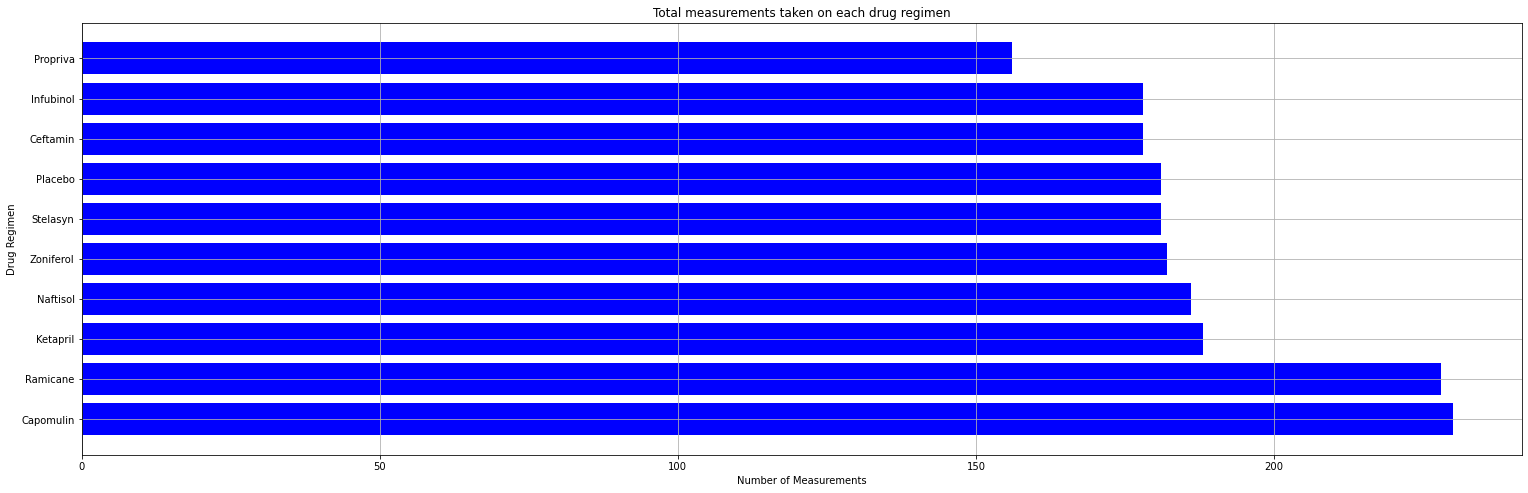

In [16]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_axes([0,0,1,1])
ax.barh(x_axis, drugs, color='b')
ax.grid(zorder=0)
plt.ylabel("Drug Regimen")
plt.xlabel("Number of Measurements")
plt.title("Total measurements taken on each drug regimen")
plt.yticks(tick_locations,drugs.index.values)
plt.show()

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_study = merged_data['Sex'].value_counts()

In [18]:
mice_study

Male      958
Female    930
Name: Sex, dtype: int64

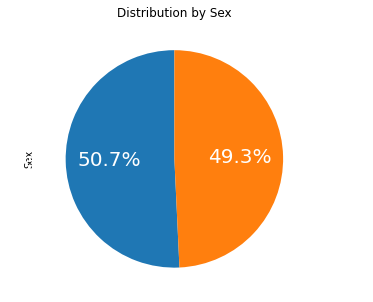

In [19]:
plot = mice_study.plot.pie(y='mice_study', figsize=(5, 5), autopct="%1.1f%%", startangle=90, title='Distribution by Sex', textprops={'color':'w', 'size':20})

Text(0.5, 1.0, 'Distribution by Sex')

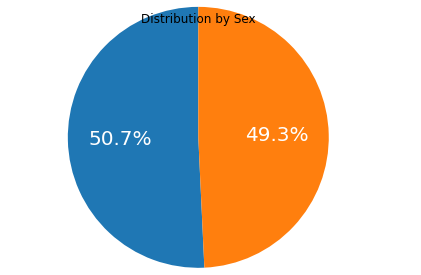

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_study, labels = mice_study.index.values, autopct = "%1.1f%%", startangle=90, textprops={'color':'w', 'size':20}, radius = 1.5)
plt.title("Distribution by Sex", loc="center")

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_timepoint = pd.DataFrame(merged_data.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max())

In [22]:
greatest_timepoint

Timepoint
Drug Regimen Mouse ID           
Capomulin    b128             45
             b742             45
             f966             20
             g288             45
             g316             45
...                          ...
Zoniferol    q633             45
             s337             45
             w140              5
             w575             45
             x613             15

[249 rows x 1 columns]

In [23]:
merged_timepoint = pd.merge(merged_data[['Mouse ID', 'Tumor_volume', 'Drug Regimen']], greatest_timepoint, on='Mouse ID', how='left')

In [24]:
merged_timepoint

,Mouse ID,Tumor_volume,Drug Regimen,Timepoint
0,k403,45.000000,Ramicane,45
1,k403,38.825898,Ramicane,45
2,k403,35.014271,Ramicane,45
3,k403,34.223992,Ramicane,45
4,k403,32.997729,Ramicane,45
...,...,...,...,...
1883,z969,63.145652,Naftisol,45
1884,z969,65.841013,Naftisol,45
1885,z969,69.176246,Naftisol,45
1886,z969,70.314904,Naftisol,45


In [25]:
merged_timepoint.tail(20)

,Mouse ID,Tumor_volume,Drug Regimen,Timepoint
1868,z795,45.000000,Naftisol,45
1869,z795,46.833475,Naftisol,45
1870,z795,48.030804,Naftisol,45
1871,z795,49.368132,Naftisol,45
1872,z795,53.280657,Naftisol,45
1873,z795,57.947100,Naftisol,45
1874,z795,59.789636,Naftisol,45
1875,z795,60.435654,Naftisol,45
1876,z795,62.376639,Naftisol,45
1877,z795,65.741070,Naftisol,45


In [54]:
Ramicane = merged_timepoint.loc[merged_timepoint["Drug Regimen"] == "Ramicane", :]

In [55]:
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = merged_timepoint.loc[merged_timepoint["Drug Regimen"] == "Capomulin", :]
Infubinol = merged_timepoint.loc[merged_timepoint["Drug Regimen"] == "Infubinol", :]
Ceftamin = merged_timepoint.loc[merged_timepoint["Drug Regimen"] == "Ceftamin", :]

In [81]:
Capomulin.head()
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

,Mouse ID,Tumor_volume,Drug Regimen,Timepoint
10,s185,45.000000,Capomulin,45
11,s185,43.878496,Capomulin,45
12,s185,37.614948,Capomulin,45
13,s185,38.177232,Capomulin,45
14,s185,36.866876,Capomulin,45


In [56]:
quartiles_Capomulin = Capomulin.Tumor_volume.quantile([.25,.50,.75])

In [70]:
quartlies_Ramicane = Ramicane.Tumor_volume.quantile([.25,.50,.75])

In [71]:
quartiles_Infubinol = Infubinol.Tumor_volume.quantile([.25,.50,.75])

In [72]:
quartiles_Ceftamin = Ceftamin.Tumor_volume.quantile([.25,.50,.75])

In [73]:
#Capomulin
lowerq = quartiles_Capomulin[0.25]
upperq = quartiles_Capomulin[0.75]
iqr = upperq-lowerq

lower_bound = (lowerq - (1.5*iqr)).round(decimals=2)
upper_bound = (upperq + (1.5*iqr)).round(decimals=2)

#Ramicane

lowerq1 = quartlies_Ramicane[0.25]
upperq1 = quartlies_Ramicane[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = (lowerq1 - (1.5*iqr1)).round(decimals=2)
upper_bound1 = (upperq1 + (1.5*iqr1)).round(decimals=2)

#Infubinol

lowerq2 = quartiles_Infubinol[0.25]
upperq2 = quartiles_Infubinol[0.75]
iqr2 = upperq2-lowerq2
lower_bound2 = (lowerq2 - (1.5*iqr2)).round(decimals=2)
upper_bound2 = (upperq2 + (1.5*iqr2)).round(decimals=2)

#Ceftamin

lowerq3 = quartiles_Ceftamin[0.25]
upperq3 = quartiles_Ceftamin[0.75]
iqr3 = upperq3-lowerq3
lower_bound3 = (lowerq3 - (1.5*iqr3)).round(decimals=2)
upper_bound3 = (upperq3 + (1.5*iqr3)).round(decimals=2)


In [74]:
f"Lower and Upper Bound for Capomulin is {lower_bound} and {upper_bound}, respectively. Any tumor volume below {lower_bound} and above {upper_bound} is an outlier"

'Lower and Upper Bound for Capomulin is 26.71 and 55.97, respectively. Any tumor volume below 26.71 and above 55.97 is an outlier'

In [75]:
f"Lower and Upper Bound for Ramicane is {lower_bound1} and {upper_bound1}, respectively. Any tumor volume below {lower_bound1} and above {upper_bound1} is an outlier"

'Lower and Upper Bound for Ramicane is 24.19 and 57.49, respectively. Any tumor volume below 24.19 and above 57.49 is an outlier'

In [76]:
f"Lower and Upper Bound for Infubinol is {lower_bound2} and {upper_bound2}, respectively. Any tumor volume below {lower_bound2} and above {upper_bound2} is an outlier"

'Lower and Upper Bound for Infubinol is 32.31 and 72.32, respectively. Any tumor volume below 32.31 and above 72.32 is an outlier'

In [77]:
f"Lower and Upper Bound for Ceftamin is {lower_bound3} and {upper_bound3}, respectively. Any tumor volume below {lower_bound3} and above {upper_bound3} is an outlier" 

'Lower and Upper Bound for Ceftamin is 32.82 and 71.19, respectively. Any tumor volume below 32.82 and above 71.19 is an outlier'

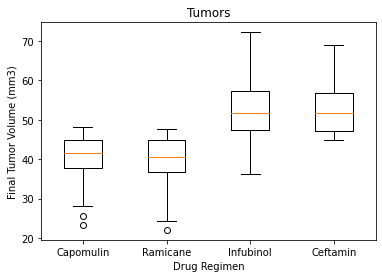

In [79]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = [Capomulin.Tumor_volume, Ramicane.Tumor_volume, Infubinol.Tumor_volume, Ceftamin.Tumor_volume]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(box_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
plt.show()

## Line and Scatter Plots

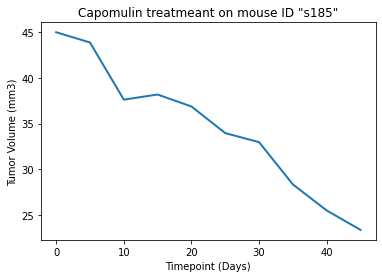

In [95]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot = merged_data.loc[((merged_data['Drug Regimen'] == 'Capomulin') & (merged_data['Mouse ID'] == 's185')), :]
line_plot
x_axis = line_plot["Timepoint"]
tumor_volume = line_plot["Tumor_volume"]

plt.title('Capomulin treatmeant on mouse ID "s185"')
plt.plot(x_axis, tumor_volume, linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

In [107]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plot = merged_data.loc[(merged_data['Drug Regimen'] == 'Capomulin'), :]
scatter_plot = scatter_plot.groupby('Mouse ID').mean()

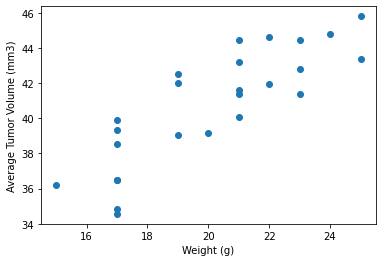

In [108]:
plt.scatter(scatter_plot['Weight (g)'],scatter_plot['Tumor_volume'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [111]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_cf = scatter_plot[['Weight (g)', 'Tumor_volume']]

In [112]:
corr_cf.corr()

,Weight (g),Tumor_volume
Weight (g),1.000000,0.841936
Tumor_volume,0.841936,1.000000


In [128]:
corr_cf = round(st.pearsonr(scatter_plot['Weight (g)'],scatter_plot['Tumor_volume'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr_cf}")

The correlation between mouse weight and average tumor volume is 0.84


In [136]:
slope, intercept, rvalue, pvalue, stderr =st.linregress(scatter_plot['Weight (g)'],scatter_plot['Tumor_volume'])

In [137]:
y = scatter_plot['Weight (g)']* slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

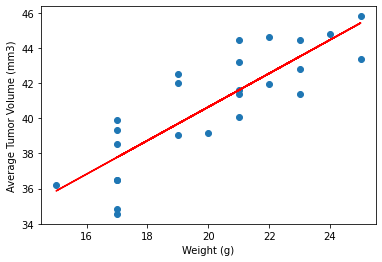

In [147]:
plt.scatter(scatter_plot['Weight (g)'],scatter_plot['Tumor_volume'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(scatter_plot['Weight (g)'],y,"r-")
plt.show()